In [1]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame, Panel
from datetime import datetime

In [2]:
import plotly.plotly as py
import cufflinks as cf

In [3]:
from matplotlib import pyplot

In [4]:
filename = './data/unhashed/russia_201901_1_tweets_csv_unhashed.csv'

In [5]:
russia = pd.read_csv(filename, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
     "urls": str,
   "user_mentions": str,
     "poll_choices": str,
})

In [9]:
russia.shape[0]

765246

In [7]:
russia.columns


Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

In [58]:
# users.groupby('tweetid').count()
# russia.userid.nunique()

In [56]:
# users[users.userid == '1701674912']

In [53]:
# grouped = 
handles_df = {}
for user_id in users.userid.unique(): 
#     print(user_id)
    if(not user_id == '2980186012' ):
        handle_cnt = users[users.userid == user_id]['user_screen_name'].nunique()
        handles_df[user_id] = handle_cnt
        if handle_cnt > 1:
            print(user_id,' : ' ,handle_cnt , '\n')

# for name,group in grouped:
#    print (name)
#    print (group)

In [55]:
# handles_df

In [8]:
 pd.crosstab(russia.is_retweet, "count")

col_0,count
is_retweet,
False,171959
True,593287


In [10]:
retweet_df = russia[russia.is_retweet]

In [55]:
user_retweet = pd.crosstab(russia.userid, russia.is_retweet)

In [67]:
user_retweet.head()

,userid,original,retweet,percentage
0,1005986451664900096,147,8,0.051613
1,1006001625075417088,147,23,0.135294
2,1006483690891988993,235,126,0.349030
3,1014394598351749120,0,1,1.000000
4,1014397190335164416,0,1,1.000000


In [58]:
user_retweet.reset_index(level=0, inplace=True)

In [61]:
user_retweet.columns = ["userid", "original", "retweet"]

In [66]:
user_retweet["percentage"] = user_retweet.retweet/(user_retweet.retweet + user_retweet.original)

In [68]:
user_retweet["percentage"].describe()

count    359.000000
mean       0.184828
std        0.289869
min        0.000000
25%        0.000000
50%        0.050000
75%        0.230852
max        1.000000
Name: percentage, dtype: float64

In [28]:
retweet_ids = pd.crosstab(retweet_df.retweet_tweetid, "count").sort_values("count", ascending = False)

In [30]:
top_retweet = retweet_ids.nlargest(5000, "count")

In [33]:
top_retweet_id = set(top_retweet.index)

In [44]:
retweet_of_suspended = russia[russia["tweetid"].isin(set(retweet_ids.index))]

In [46]:
retweet_of_suspended.shape[0]/retweet_df.shape[0] #No of tweet retweet from bots

0.0138583855705586

In [47]:
top_retweet_of_suspended = russia[russia["tweetid"].isin(top_retweet_id)]

In [48]:
top_retweet_of_suspended.shape[0]/top_retweet.shape[0] #number of top most retweeted retweet from bots

0.5766

In [50]:
top_retweet_of_suspended

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
208,716848382740828160,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,0.0,1.0,3.0,"[ObamaUSUCK, Obamaistheworstpresidentever, Oba...",[https://twitter.com/reuterspolitics/status/71...,[],NaN
342,845351423600615424,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,2.0,1.0,4.0,8.0,"[IslamIsTheProblem, IslamIsPureEvil, WorldNews...",[https://twitter.com/michaelkeyes/status/84532...,[],NaN
8845,733181596983943168,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,0.0,2.0,7.0,"[obamaisamuslimlover, obamaUSUCK, obamaisthewo...",[https://twitter.com/365usa/status/73315864836...,[],NaN
9035,803003334256795648,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,1.0,8.0,4.0,"[BoycottingList, DishonestMedia, BoycottHamilt...",[],"[nbc, ABC, CBS, CNN, MSNBC]",NaN
9101,695154646365548544,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,2.0,2.0,34.0,39.0,"[ObamaMosqueVisit, ObamaEatsDogs, obamaisamusl...",[],[],NaN
9460,594470484709740544,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,0.0,3.0,2.0,"[Infidel, infidellivesmatter, infidelforlife]",[],[],NaN
9823,836134464182861824,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,0.0,7.0,15.0,"[BanTheMuslimBrotherhood, DeportALLMoslems, Ba...",[https://twitter.com/securefreedom/status/8358...,[],NaN
9879,820553789220339712,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,1.0,3.0,9.0,"[CloseALLMosquesNOW, DeportALLMuslims, BanShar...",[https://twitter.com/vigilpatriot/status/82054...,[],NaN
10025,921403392991248384,876253192492687361,SamTheInfidel👩‍💻,BurkasBan2,United States 🌎🇺🇸,#EducateYourselfOnIslam #BanShariaLaw #BanTheQ...,NaN,3020,2518,2017-06-18,...,NaN,NaN,0.0,0.0,2.0,6.0,"[StopTheCircleOfJihad, StopTeachingHATEIslam, ...",[],[],NaN
10201,806045356655947776,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,4.0,1.0,14.0,18.0,"[BanIslamInAmerica, BanShariaLaw, BanTheQuranA...",[https://twitter.com/amymek/status/80564265620...,[],NaN


In [36]:
retweet_of_suspended.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
208,716848382740828160,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,0.0,1.0,3.0,"[ObamaUSUCK, Obamaistheworstpresidentever, Oba...",[https://twitter.com/reuterspolitics/status/71...,[],NaN
342,845351423600615424,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,2.0,1.0,4.0,8.0,"[IslamIsTheProblem, IslamIsPureEvil, WorldNews...",[https://twitter.com/michaelkeyes/status/84532...,[],NaN
8845,733181596983943168,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,0.0,2.0,7.0,"[obamaisamuslimlover, obamaUSUCK, obamaisthewo...",[https://twitter.com/365usa/status/73315864836...,[],NaN
9035,803003334256795648,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,0.0,1.0,8.0,4.0,"[BoycottingList, DishonestMedia, BoycottHamilt...",[],"[nbc, ABC, CBS, CNN, MSNBC]",NaN
9101,695154646365548544,2980186012,Infidel II 🕋💣🕋💩,CathyTo47590555,USA #IslamIsTheProbem #WakeUp,I believe that OUR COUNTRY needs to BAN ISLAM ...,NaN,8685,1451,2015-01-15,...,NaN,NaN,2.0,2.0,34.0,39.0,"[ObamaMosqueVisit, ObamaEatsDogs, obamaisamusl...",[],[],NaN


In [39]:
self_retweet = retweet_df[retweet_df["retweet_userid"] == retweet_df["userid"]]

In [51]:
#number of top tweets retweeted by itself
retweet_df[(retweet_df["retweet_tweetid"].isin(top_retweet_id)) & (retweet_df["retweet_userid"] == retweet_df["userid"])].shape[0]/top_retweet_of_suspended.shape[0]

12.903225806451612

In [ ]:
retweet_df[(retweet_df["retweet_tweetid"].isin(top_retweet_id)) & (retweet_df["retweet_userid"] == retweet_df["userid"])].shape[0]/top_retweet_of_suspended.shape[0]

In [40]:
self_retweet.shape[0]/retweet_df.shape[0] #number of self retweet

0.08149849904009358

In [43]:
# top_retweet[top_retweet["retweet_userid"]==top_retweet["userid"]].shape[0]/top_retweet.shape[0]

0.0

In [29]:
# retweet_ids = retweet_ids[retweet_ids["count"]>1]

In [26]:
retweet_ids.shape[0]

21690

In [31]:
top_retweet["count"].describe() #summary of top 10% most retweet

count    5000.000000
mean        9.720800
std         5.478654
min         4.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        41.000000
Name: count, dtype: float64

In [11]:
retweet_df.shape[0]

593287

In [63]:
tweet_cnt = pd.crosstab(russia.userid, "count")

In [68]:
tweet_cnt["count"].describe()

count       359.000000
mean       2131.604457
std       19417.180509
min           1.000000
25%          10.000000
50%         145.000000
75%         252.500000
max      313065.000000
Name: count, dtype: float64

In [1]:
tweet_cnt[tweet_cnt['count'] > 100].sort_values('count', ascending=False).head()

NameError: name 'tweet_cnt' is not defined

In [9]:
#russia['tweet_time']

In [9]:
russia['tweet_record_time'] = pd.to_datetime(russia['tweet_time'], format ='%Y-%m-%d %H:%M')

In [ ]:
#russia['tweet_record_time']

In [10]:
time = []

In [11]:
for i in russia['tweet_record_time']:
    time.append(i.time())
    #print(i.time())

In [12]:
russia['time'] = time

In [13]:
hour =[]

In [14]:
for i in russia['time']:
    hour.append(i.hour)
    #print(i.time())

In [15]:
russia['hour'] = hour

In [18]:
#russia.longtitude

In [32]:
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

#russia.iplot(x='time',kind='scatter') 

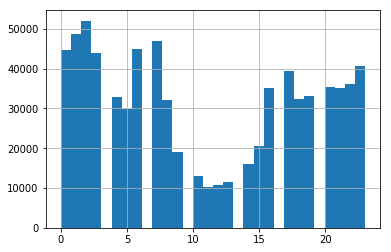

In [16]:
russia['hour'].hist(bins = 30)

In [4]:
import numpy as np; np.random.seed(10)
import seaborn as sns;

In [5]:
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
sns.set()

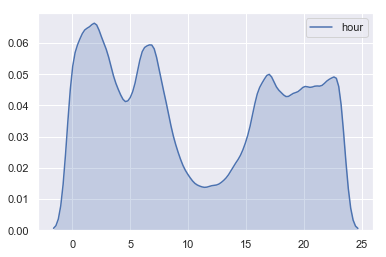

In [19]:
sns.kdeplot(russia['hour'], shade=True)

In [31]:
#russia['hour'].plot()
#pyplot.show()

In [9]:
def processHour(filename = None):
    df = pd.read_csv(filename, dtype = {
        "tweetid": str,
        "userid": str,
        "user_display_name": str,
        "user_screen_name": str,
        "user_reported_location": str,
        "user_profile_description": str,
        "user_profile_url": str,
        "follower_count": str,
        "following_count": str,
        "account_creation_date": str,
        "account_language": str,
        "tweet_text": str,
        "tweet_time": str,
        "tweet_client_name": str,
        "in_reply_to_tweetid": str,
        "in_reply_to_userid": str,
        "quoted_tweet_tweetid": str,
        "is_retweet": bool,
        "retweet_userid": str,
        "retweet_tweetid": str,
        "latitude": str,
        "longitude": str,
        "quote_count": np.float64,
        "reply_count": np.float64,
        "like_count": np.float64,
        "retweet_count": np.float64,
        "hashtags": str,
        "urls": str,
        "user_mentions": str,
        "poll_choices": str,
    })
    
    df['tweet_record_time'] = pd.to_datetime(df['tweet_time'], format ='%Y-%m-%d %H:%M')


    time = []

    for i in df['tweet_record_time']:
        time.append(i.time())

    df['time'] = time


    hour =[]


    for i in df['time']:
        hour.append(i.hour)
     

    df['hour'] = hour

    return df

In [10]:
filename = './data/unhashed/russia_201901_1_tweets_csv_unhashed.csv'
russia = processHour(filename)

In [7]:
filename = './data/unhashed/iranian_tweets_csv_unhashed.csv'
iranian = processHour(filename)

In [23]:
# filename = './data/unhashed/venezuela_201901_2_tweets_csv_unhashed.csv'
# venezuala_two = processHour(filename)

In [12]:
filename = './data/unhashed/bangladesh_201901_1_tweets_csv_unhashed.csv'
bangladesh = processHour(filename)

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [11]:
# russia['hour'].unique()

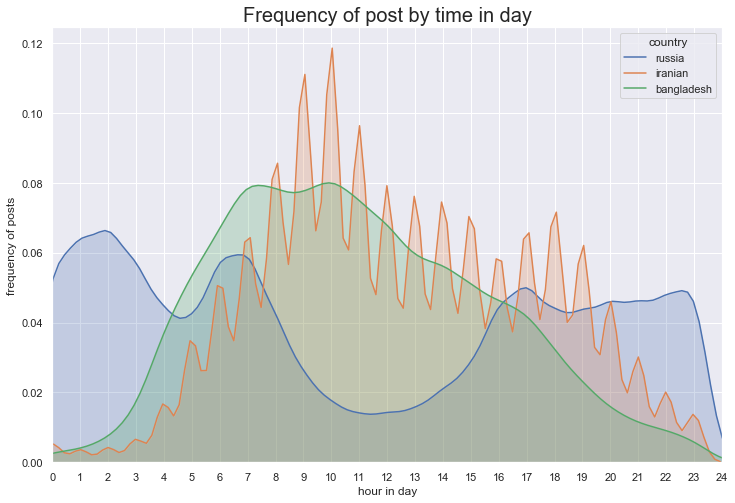

In [11]:
sns.set()
    
    
g = sns.kdeplot(russia['hour'], shade=True)
g = sns.kdeplot(iranian['hour'], shade=True)
g = sns.kdeplot(bangladesh['hour'], shade=True)

# legend = g._legend
# legend.set_title("Frequency of post by time in day")
# for t, l in zip(legend.texts,('russia', 'iranian', 'bangladesh')):
#     t.set_text(l)


# new_title = 'Frequency of post by time in day'
# leg.set_title(new_title)
# new_labels = ['russia', 'iranian', 'bangladesh']
# for t, l in zip(leg.texts, new_labels): t.set_text(l)

axes = plt.gca()
axes.set_xlim([0,24])

plt.xlabel('hour in day')
plt.ylabel('frequency of posts')
plt.xticks(np.arange(0,25, step = 1))
plt.title('Frequency of post by time in day', fontsize=20)
plt.legend(title='country', loc='upper right', labels=['russia', 'iranian', 'bangladesh'])
plt.show(g)

In [9]:
def influenceMeasure(df):
    influence_df = df.groupby(['hour']).agg({'quote_count':'mean','retweet_count':'mean', 'like_count':'mean', 'reply_count':'mean'}).reset_index()
    return influence_df

In [10]:
# russia[["hour", "quote_count", "retweet_count", "like_count", "reply_count", "userid"]]

In [11]:
# russia =russia.replace("0.0","0")

# russia = russia.astype({"hour":np.float64, "quote_count":np.float64, "retweet_count":np.float64, "like_count":np.float64, "reply_count":np.float64, "userid":np.float64})

influence_russia = influenceMeasure(russia[["hour", "quote_count", "retweet_count", "like_count", "reply_count", "userid"]])

In [12]:
influence_russia["country"] = "russia"

In [13]:
influence_russia.to_csv("influence_by_hour_avg.csv")

In [10]:
# iranian =iranian.replace("0.0","0")

# iranian= iranian.astype({"hour":np.float64, "quote_count":np.float64, "retweet_count":np.float64, "like_count":np.float64, "reply_count":np.float64, "userid":np.float64})

influence_iranian = influenceMeasure(iranian[["hour", "quote_count", "retweet_count", "like_count", "reply_count", "userid"]])

In [15]:
influence_iranian["country"] = "iranian"
influence_iranian.to_csv("influence_by_hour_avg.csv", mode = 'a', header = False)

In [13]:
influence_bangladesh = influenceMeasure(bangladesh[["hour", "quote_count", "retweet_count", "like_count", "reply_count", "userid"]])

In [15]:
influence_bangladesh.dtypes

hour               int64
quote_count      float64
retweet_count    float64
like_count       float64
reply_count      float64
country           object
dtype: object

In [16]:
influence_bangladesh["country"] = "bangladesh"
influence_bangladesh.to_csv("influence_by_hour_avg.csv", mode = 'a', header = False)

In [17]:
influence_df = df = pd.read_csv("influence_by_hour_avg.csv", dtype = {"hour":np.int64,  "quote_count":np.float64, "retweet_count":np.float64, "like_count":np.float64, "reply_count":np.float64, "country":str})

In [22]:
influence_df[influence_df.country=="bangladesh"]

,Unnamed: 0,hour,quote_count,retweet_count,like_count,reply_count,country
48,0,0,0.0,1.0,18.0,2.0,bangladesh
49,1,1,0.0,60.0,146.0,3.0,bangladesh
50,2,2,0.0,4.0,42.0,3.0,bangladesh
51,3,3,0.0,13.0,109.0,4.0,bangladesh
52,4,4,0.0,14.0,148.0,4.0,bangladesh
53,5,5,1.0,30.0,327.0,6.0,bangladesh
54,6,6,1.0,39.0,304.0,9.0,bangladesh
55,7,7,1.0,66.0,371.0,8.0,bangladesh
56,8,8,2.0,33.0,420.0,13.0,bangladesh
57,9,9,2.0,206.0,666.0,8.0,bangladesh


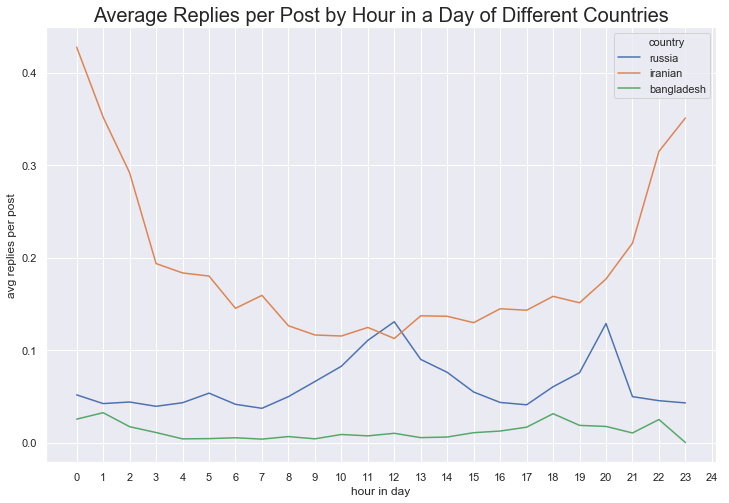

In [23]:
sns.set()   
ax = sns.lineplot(x="hour", y="reply_count", hue="country", data=influence_df)


plt.xlabel('hour in day')
plt.ylabel('avg replies per post')
plt.xticks(np.arange(0,25, step = 1))
plt.title('Average Replies per Post by Hour in a Day of Different Countries', fontsize=20)
# plt.legend(title='country', loc='upper right', labels=['russia', 'iranian', 'bangladesh'])
plt.show(ax)
# plt.yticks(np.arange(0, 250000, step=100))

In [19]:
russia.hour.unique()

array([ 9, 22, 19,  1,  6, 17,  5, 16, 20,  7,  2,  4, 14, 21, 18, 23,  3,
       15, 13,  8,  0, 10, 12, 11], dtype=int64)

In [15]:
russia['country'] = 'russia'
iranian['country'] = 'iranian'
bangladesh['country'] = 'bangladesh'

In [53]:
#iranian.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,tweet_record_time,time,hour,country
0,918741290078138368,867065768973713408,Contra el Trumpismo,ContraTrumpismo,"Caracas, Venezuela",Todo el mundo es lleno de los Crímenes de EEUU...,NaN,1962,2054,2017-05-23,...,0.0,0.0,[EEUU],[],[],NaN,2017-10-13 07:32:00,07:32:00,7,iranian
1,954286721633529856,867065768973713408,Contra el Trumpismo,ContraTrumpismo,"Caracas, Venezuela",Todo el mundo es lleno de los Crímenes de EEUU...,NaN,1962,2054,2017-05-23,...,4.0,3.0,[Corea_del_Norte],[],[],NaN,2018-01-19 09:37:00,09:37:00,9,iranian
2,913429163025010688,867065768973713408,Contra el Trumpismo,ContraTrumpismo,"Caracas, Venezuela",Todo el mundo es lleno de los Crímenes de EEUU...,NaN,1962,2054,2017-05-23,...,0.0,0.0,[Seúl],[],[867065768973713408],NaN,2017-09-28 15:44:00,15:44:00,15,iranian
3,406699069038292993,1443219385,Whatsupic,Whatsupic,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,0.0,0.0,[Gaza],[http://whatsupic.com/news-politics-world/1385...,NaN,NaN,2013-11-30 08:19:00,08:19:00,8,iranian
4,383923374436515841,1443219385,Whatsupic,Whatsupic,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,0.0,0.0,"[Mexico, JavierHernandez]",[http://whatsupic.com/sports-mexico/3180-mexic...,NaN,NaN,2013-09-28 11:57:00,11:57:00,11,iranian


In [54]:
russia.to_csv("rus_tweet.csv")

In [16]:
russia.to_csv("all_tweet.csv")

In [56]:
bangladesh.to_csv("bang_tweet.csv")

In [17]:
bangladesh.to_csv("all_tweet.csv", mode='a', header= False)

In [59]:
iranian.to_csv("iran_tweet.csv")

In [18]:
iranian.to_csv("all_tweet.csv", mode='a', header = False)

In [19]:

pd.crosstab(russia.is_retweet, "count")

col_0,count
is_retweet,
False,171959
True,593287


In [20]:

pd.crosstab(iranian.is_retweet, "count")

col_0,count
is_retweet,
False,890599
True,232337


In [21]:

pd.crosstab(bangladesh.is_retweet, "count")

col_0,count
is_retweet,
False,25192
True,1022


In [13]:

retweet_percentage = DataFrame()


In [72]:


def retweetPercentage(df, country, retweet_percentage): 
#     retweet_df = df[df.is_retweet]
    user_retweet = pd.crosstab(df.userid, df.is_retweet)
    user_retweet.reset_index(level=0, inplace=True)
    user_retweet.columns = ["userid", "original", "retweet"]
    user_retweet["country"] = country
    user_retweet["percentage"] = user_retweet.retweet/(user_retweet.retweet + user_retweet.original)
    print(user_retweet["percentage"].describe())
    print(user_retweet[user_retweet.percentage == 1])
    if len(retweet_percentage.index) > 0:
        retweet_percentage= pd.concat([retweet_percentage, user_retweet[["country","userid", "percentage"]]])
    else:
        retweet_percentage = user_retweet[["country","userid", "percentage"]]
    return retweet_percentage

In [57]:
retweet_percentage = retweetPercentage(russia, "russia",retweet_percentage)

count    359.000000
mean       0.184828
std        0.289869
min        0.000000
25%        0.000000
50%        0.050000
75%        0.230852
max        1.000000
Name: percentage, dtype: float64
                userid  original  retweet country  percentage
0  1005986451664900096       147        8  russia    0.051613
1  1006001625075417088       147       23  russia    0.135294
2  1006483690891988993       235      126  russia    0.349030
3  1014394598351749120         0        1  russia    1.000000
4  1014397190335164416         0        1  russia    1.000000


In [78]:
# retweetPercentage(russia, "russia",DataFrame()).sort_values("percentage", ascending = False)

In [77]:
# pd.crosstab(russia.userid, russia.is_retweet).sort_values(True, ascending = False)

In [66]:
all_retweet = retweet_percentage[(retweet_percentage.country == "russia") & (retweet_percentage.percentage == 1)]

In [70]:
# all_retweet

In [79]:
# pd.crosstab(russia[russia.userid.isin(all_retweet.userid)].userid, russia.is_retweet)

In [58]:
retweet_percentage = retweetPercentage(iranian, "iranian",retweet_percentage)

count    660.000000
mean       0.537383
std        0.364993
min        0.000000
25%        0.142651
50%        0.634046
75%        0.868092
max        1.000000
Name: percentage, dtype: float64
                userid  original  retweet  country  percentage
0  1000361556155228160        58        0  iranian    0.000000
1  1000401169313824768        42        1  iranian    0.023256
2  1000652498011639808        14       21  iranian    0.600000
3  1000705337924685824       332       16  iranian    0.045977
4  1000730947506114562         1        3  iranian    0.750000


In [59]:
retweet_percentage = retweetPercentage(bangladesh, "bangladesh",retweet_percentage)

count    11.000000
mean      0.044874
std       0.127686
min       0.000000
25%       0.000000
50%       0.000000
75%       0.013831
max       0.428198
Name: percentage, dtype: float64
                userid  original  retweet     country  percentage
0  1028275673868034049       122        0  bangladesh    0.000000
1           2305259636      4027      158  bangladesh    0.037754
2             41353220      2097       37  bangladesh    0.017338
3            560384162      1095      820  bangladesh    0.428198
4   769858236149145601      2877        0  bangladesh    0.000000


In [60]:
retweet_percentage.head()

,country,userid,percentage
0,russia,1005986451664900096,0.051613
1,russia,1006001625075417088,0.135294
2,russia,1006483690891988993,0.349030
3,russia,1014394598351749120,1.000000
4,russia,1014397190335164416,1.000000


In [ ]:
retweet_percentage["country"] = retweet_percentage

Text(0, 0.5, 'Percentage of retweet %')

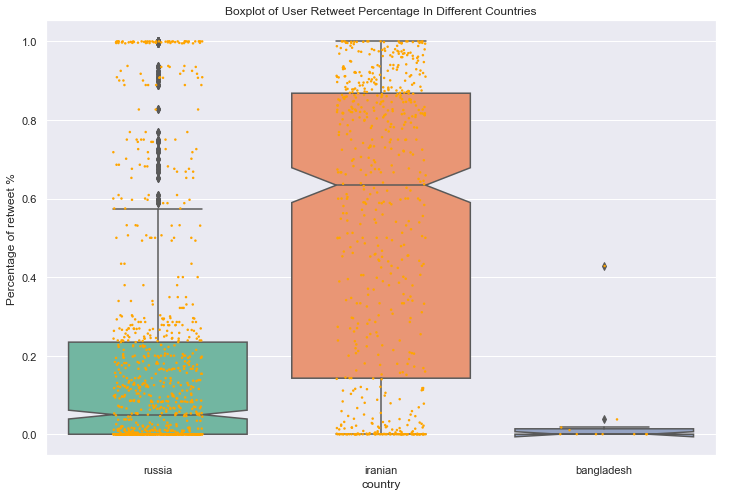

In [92]:
ax = sns.boxplot(x='country', y='percentage', data = retweet_percentage, notch=True, palette="Set2")

# ax = sns.swarmplot(x='country', y='percentage', data = retweet_percentage, color="grey")
ax = sns.stripplot(x='country', y='percentage', data = retweet_percentage, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot of User Retweet Percentage In Different Countries", loc="center")
plt.ylabel("Percentage of retweet %")


In [7]:
def selfRetweet(df, country):
    tweet_ids = set(df.tweetid.tolist())
#     print(tweet_ids)
    retweet_df = df[df.is_retweet]
    retweet_network = retweet_df[retweet_df.retweet_tweetid.isin(tweet_ids)]
#     self_retweet = df[(df.is_retweet) & (df.retweet_tweetid.isin(tweet_ids))]
    return retweet_network

In [11]:
russia_self_retweet = selfRetweet(russia, "russia")

In [13]:
 retweet_russia = russia[russia.is_retweet]

In [14]:
russia_self_retweet.shape[0]/retweet_russia.shape[0]

0.06388139298518256